In [90]:
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np

In [96]:
covid_data = pd.read_csv("Project-1-Test/Resources/combined_covid_census_data.csv")
covid_data

,County,Cumulative Deaths by End of Month,New Deaths During Month,Cumulative Confirmed Cases by End of Month,New Confirmed Cases During Month,Month,Year,Latitude,Longitude,Median Income,...,Total Black Population,Total American Indian Population,Total Asian Poulation,Total Population Identifying as 2+ Races,Total Hispanic Population,Total Pop Using Public Transit,Land Area (mi^2),Population Density (persons/mi^2),New Cases/ 100k People,New Deaths/ 100k People
0,Alameda,858,279,75947,22429,Jan,2021,37.65,-121.89,104888.0,...,171922.0,11037.0,519249.0,130496.0,369546.0,114029.0,739,2248.422192,1349.856522,16.791206
1,Alpine,0,0,74,7,Jan,2021,38.60,-119.82,85750.0,...,10.0,360.0,6.0,111.0,183.0,4.0,738,1.570461,603.968939,0.000000
2,Amador,32,8,3260,747,Jan,2021,38.45,-120.66,65187.0,...,931.0,276.0,375.0,2834.0,5591.0,35.0,595,65.584874,1914.255695,20.500730
3,Butte,141,36,11789,3387,Jan,2021,39.67,-121.60,54972.0,...,3866.0,2628.0,10743.0,15608.0,37585.0,1010.0,1636,136.518337,1516.494735,16.118633
4,Calaveras,21,0,1796,632,Jan,2021,38.21,-120.55,67054.0,...,450.0,518.0,864.0,2912.0,5710.0,142.0,1020,44.929412,1379.069564,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Tulare,1160,64,89376,3590,Dec,2021,36.22,-118.80,52534.0,...,7606.0,5955.0,17310.0,37160.0,301919.0,1120.0,4824,96.176410,773.781940,13.794441
692,Tuolumne,91,1,8170,413,Dec,2021,38.03,-119.95,60509.0,...,1007.0,948.0,753.0,2789.0,6810.0,91.0,2221,24.379559,762.738471,1.846824
693,Ventura,1211,21,113907,9924,Dec,2021,34.44,-119.09,89295.0,...,15422.0,6990.0,61239.0,71894.0,361648.0,3998.0,1843,458.816603,1173.605929,2.483447
694,Yolo,270,13,23281,1764,Dec,2021,38.68,-121.90,73746.0,...,5694.0,1420.0,31584.0,21326.0,69341.0,4097.0,1015,215.540887,806.311536,5.942205


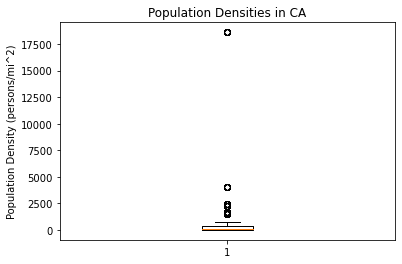

Upper bound = 876.167487


In [94]:
pop_density = covid_data["Population Density (persons/mi^2)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Population Densities in CA")
ax1.set_ylabel("Population Density (persons/mi^2)")
ax1.boxplot(pop_density)
plt.show()

quartiles = pop_density.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
upper_bound = upperq + (1.5*iqr)

print("Upper bound = %f" % upper_bound)

In [97]:
no_pop_density_outliers = covid_data.loc[covid_data["Population Density (persons/mi^2)"] <= 876.167487, :]
no_pop_density_outliers

,County,Cumulative Deaths by End of Month,New Deaths During Month,Cumulative Confirmed Cases by End of Month,New Confirmed Cases During Month,Month,Year,Latitude,Longitude,Median Income,...,Total Black Population,Total American Indian Population,Total Asian Poulation,Total Population Identifying as 2+ Races,Total Hispanic Population,Total Pop Using Public Transit,Land Area (mi^2),Population Density (persons/mi^2),New Cases/ 100k People,New Deaths/ 100k People
1,Alpine,0,0,74,7,Jan,2021,38.60,-119.82,85750.0,...,10.0,360.0,6.0,111.0,183.0,4.0,738,1.570461,603.968939,0.000000
2,Amador,32,8,3260,747,Jan,2021,38.45,-120.66,65187.0,...,931.0,276.0,375.0,2834.0,5591.0,35.0,595,65.584874,1914.255695,20.500730
3,Butte,141,36,11789,3387,Jan,2021,39.67,-121.60,54972.0,...,3866.0,2628.0,10743.0,15608.0,37585.0,1010.0,1636,136.518337,1516.494735,16.118633
4,Calaveras,21,0,1796,632,Jan,2021,38.21,-120.55,67054.0,...,450.0,518.0,864.0,2912.0,5710.0,142.0,1020,44.929412,1379.069564,0.000000
5,Colusa,9,2,1977,580,Jan,2021,39.18,-122.23,59427.0,...,330.0,239.0,201.0,2308.0,12840.0,13.0,1151,18.671590,2698.804151,9.306221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Tulare,1160,64,89376,3590,Dec,2021,36.22,-118.80,52534.0,...,7606.0,5955.0,17310.0,37160.0,301919.0,1120.0,4824,96.176410,773.781940,13.794441
692,Tuolumne,91,1,8170,413,Dec,2021,38.03,-119.95,60509.0,...,1007.0,948.0,753.0,2789.0,6810.0,91.0,2221,24.379559,762.738471,1.846824
693,Ventura,1211,21,113907,9924,Dec,2021,34.44,-119.09,89295.0,...,15422.0,6990.0,61239.0,71894.0,361648.0,3998.0,1843,458.816603,1173.605929,2.483447
694,Yolo,270,13,23281,1764,Dec,2021,38.68,-121.90,73746.0,...,5694.0,1420.0,31584.0,21326.0,69341.0,4097.0,1015,215.540887,806.311536,5.942205


P-value = 0.1402631685348736 and r-value = -0.05595936963705679


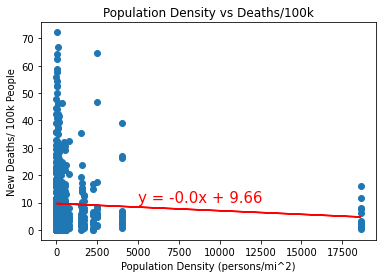

In [101]:
x_values = covid_data["Population Density (persons/mi^2)"]
y_values = covid_data["New Deaths/ 100k People"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5000,10), fontsize=15, color="red")
plt.xlabel("Population Density (persons/mi^2)")
plt.ylabel("New Deaths/ 100k People")
plt.title("Population Density vs Deaths/100k")
print(f"P-value = {pvalue} and r-value = {rvalue}")

P-value = 0.03767523023160854 and r-value = -0.07879954579224009


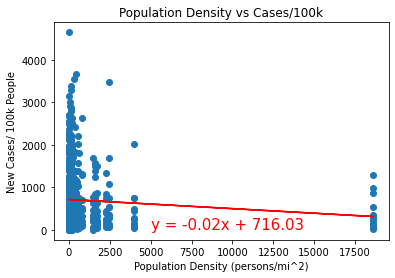

In [100]:
x_values = covid_data["Population Density (persons/mi^2)"]
y_values = covid_data["New Cases/ 100k People"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5000,10), fontsize=15, color="red")
plt.xlabel("Population Density (persons/mi^2)")
plt.ylabel("New Cases/ 100k People")
plt.title("Population Density vs Cases/100k")
print(f"P-value = {pvalue} and r-value = {rvalue}")